In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from plotly import express as px
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
data = pd.read_csv("vgsales.csv")

In [6]:
data1=data[(data.Year >= 2005) & (data.Year <= 2010)]
data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [7]:
data1.shape

(7269, 11)

In [8]:
data1.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [9]:
data1.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,7269.000000,7269.000000,7269.000000,7269.000000,7269.000000,7269.000000,7269.000000
mean,8694.991333,2007.712203,0.249320,0.132673,0.050893,0.053607,0.486829
std,4757.797334,1.640835,0.836132,0.590516,0.268474,0.195003,1.717601
min,1.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4612.000000,2006.000000,0.010000,0.000000,0.000000,0.000000,0.050000
50%,8823.000000,2008.000000,0.090000,0.010000,0.000000,0.010000,0.150000
75%,12862.000000,2009.000000,0.230000,0.080000,0.020000,0.040000,0.420000
max,16599.000000,2010.000000,41.490000,29.020000,6.500000,8.460000,82.740000


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7269 entries, 0 to 16596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          7269 non-null   int64  
 1   Name          7269 non-null   object 
 2   Platform      7269 non-null   object 
 3   Year          7269 non-null   float64
 4   Genre         7269 non-null   object 
 5   Publisher     7261 non-null   object 
 6   NA_Sales      7269 non-null   float64
 7   EU_Sales      7269 non-null   float64
 8   JP_Sales      7269 non-null   float64
 9   Other_Sales   7269 non-null   float64
 10  Global_Sales  7269 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 681.5+ KB


In [11]:
data1.isna().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [12]:
(data1.isna().sum() * 100) / data1.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.000000
Genre           0.000000
Publisher       0.110056
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [13]:
categorical_df = data1.select_dtypes('O')

categorical_df.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
6,New Super Mario Bros.,DS,Platform,Nintendo
7,Wii Play,Wii,Misc,Nintendo


In [14]:
numerical_df = data1.select_dtypes(('int', 'float'))

numerical_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
6,2006.0,11.38,9.23,6.50,2.90,30.01
7,2006.0,14.03,9.20,2.93,2.85,29.02


In [15]:
categorical_features = categorical_df.columns
print(categorical_features)

print('-' * 60)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
------------------------------------------------------------
Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


In [16]:
for category_name in categorical_features:
    print('-' * 50)
    print("Column Name: ", category_name)
    print(' ' * 50)
    
    print(data1[category_name].value_counts().head())
    
    print('-' * 50)
    print('-' * 50)

--------------------------------------------------
Column Name:  Name
                                                  
Ratatouille                                9
Cars                                       8
LEGO Star Wars II: The Original Trilogy    8
Madden NFL 07                              8
Madden NFL 08                              8
Name: Name, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Platform
                                                  
DS      1920
Wii     1092
PS2     1058
PSP      870
X360     735
Name: Platform, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Genre
                                                  
Action          1306
Sports           997
Misc             995
Adventure        658


In [17]:
data1.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       8
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
data1['Publisher'].describe()

count                7261
unique                296
top       Electronic Arts
freq                  646
Name: Publisher, dtype: object

In [19]:
data1.Publisher.value_counts(normalize=True)

Electronic Arts                 0.088968
Activision                      0.067897
Ubisoft                         0.067759
THQ                             0.052885
Konami Digital Entertainment    0.051508
                                  ...   
Big Fish Games                  0.000138
Ivolgamus                       0.000138
Abylight                        0.000138
Agetec                          0.000138
Jester Interactive              0.000138
Name: Publisher, Length: 296, dtype: float64

In [44]:
data1.Publisher = data1.Publisher.fillna(data1.Publisher.mode()[0])

In [21]:
data1[['Publisher','Year']].dtypes

Publisher     object
Year         float64
dtype: object

In [22]:
data1.isna().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
data = data1.copy()

le = LabelEncoder()

In [25]:
feature = ["Platform", "Genre"]


for col in feature:
    data[col] = le.fit_transform(data1[col])

In [26]:
x = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = data['Global_Sales'].values

In [27]:
x[:5], y[:5]

(array([[ 8.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [ 8.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [ 8.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 1.  ,  4.  , 11.38,  9.23,  6.5 ,  2.9 ],
        [ 8.  ,  3.  , 14.03,  9.2 ,  2.93,  2.85]]),
 array([82.74, 35.82, 33.  , 30.01, 29.02]))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5815, 6), (5815,), (1454, 6), (1454,))

In [31]:
from sklearn.linear_model import LinearRegression

# Import r2 score for Calculation
from sklearn.metrics import r2_score

In [32]:
lr = LinearRegression()

lr.fit(x_train, y_train)

pred = lr.predict(x_test)
print(lr.score(x_test, y_test))

0.9999913149853341


In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
kRange = range(1,15,1)
scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(x_train,y_train)
    pred = regressor_knn.predict(x_test)
    
    scores_list.append(r2_score(y_test,pred))

In [35]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(x_train,y_train)
pred = regressor_knn.predict(x_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9489475104414368


In [36]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)

In [37]:
dtr.fit(x_train, y_train)

pred = dtr.predict(x_test)

print(r2_score(y_test, pred))

0.935657891421254


In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state= 10)

In [39]:
rfr.fit(x_train, y_train)

pred = rfr.predict(x_test)

print(r2_score(y_test, pred))

0.9330261455004049


In [40]:
data5 = {'Model': ['LR', 'KNN', 'DT', 'RF'], 
        'Model_Score': [0.999,0.948, 0.935, 0.933], 
        }

In [41]:
df = pd.DataFrame(data5)

In [42]:
df

,Model,Model_Score
0,LR,0.999
1,KNN,0.948
2,DT,0.935
3,RF,0.933


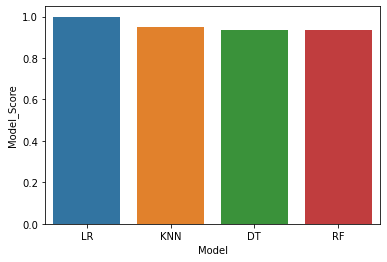

In [43]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Model_Score', data =df )